In [0]:
#Всю информацию по предобработки смотри на 
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/1_notmnist.ipynb
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [0]:
# read pickle file
with open('notMNIST_cor1.pickle', 'rb') as f:
    dataset = pickle.load(f)
dataset_key = dataset.keys()

train_dataset, train_labels = dataset['train_dataset'], dataset['train_labels']
valid_dataset, valid_labels = dataset['valid_dataset'], dataset['valid_labels']
test_dataset, test_labels = dataset['test_dataset'], dataset['test_labels']

del dataset

# merge valid_dataset and test_dataset
# test_dataset, test_labels = np.concatenate((valid_dataset, test_dataset), axis=0), np.concatenate((valid_labels, test_labels), axis=0)
# print(test_dataset.shape, test_labels.shape)

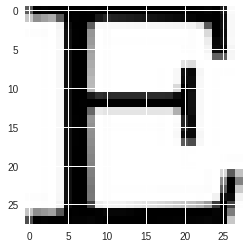

label 4.0


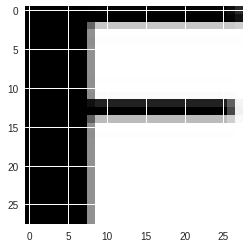

label 5.0


In [6]:
# убеждаюсь, что метки  и изображения совпадают
index = np.random.randint(test_labels.shape[0], size=2)
plt.imshow(test_dataset[index[0], : :])
plt.show()

print("label {}".format(test_labels[index[0]]))

plt.imshow(train_dataset[index[1], : :])
plt.show()

print("label {}".format(train_labels[index[1]]))

In [7]:
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (15000, 28, 28) (15000,)
Testing: (16355, 28, 28) (16355,)


(200000, 1, 28, 28) X_train.shape
200000 train_samples
15000 valid_samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 16, 28, 28)        160       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 28, 28)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 14, 14)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 14, 14)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 7, 7)         0         
_________________________________________________________________
c

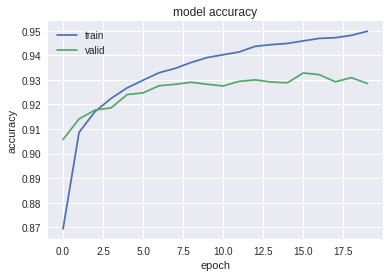

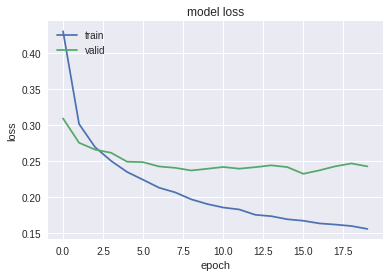

In [18]:
# с помощью Keras
from keras import backend as k
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt


# Часть 1 -подготовка
# сеть и ее обучение
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASES = 10 #количество классов
# OPTIMIZER = SGD() # в качестве оптимизатора стохастический градиентный спуск
OPTIMIZER = Adam(lr=0.001)# в качестве оптимизатора стохастический градиентный спуск
# lr - скорость сходимости
#OPTIMIZER = RMSprop() # в качестве оптимизатора стохастический градиентный спуск
VALIDATION_SPLIT = 0.05 #сколько выделить примеров из обучающего набора на кросс-валидацию
IMG_ROWS, IMG_COLS = 28, 28 #размер входного изображения
INPUT_SHAPE = [1, IMG_ROWS, IMG_COLS]
k.set_image_dim_ordering("th")

# загружаем данные и перемешиваем и делим на обучение и тест
(X_train, y_train), (X_valid, y_valid) = (train_dataset, train_labels), (valid_dataset, valid_labels)

# нам нужна форма 60К * [1*28*28], подаваемая на вход CNN
X_train = X_train[:, np.newaxis, :, :]
X_valid = X_valid[:, np.newaxis, :, :]

# для ядра tf меняем размерность изображений
# k.set_image_dim_ordering("tf")
# INPUT_SHAPE = [IMG_ROWS, IMG_COLS, 1]
# X_train = np.transpose(X_train, (0, 2, 3, 1))
# X_valid = np.transpose(X_valid, (0, 2, 3, 1))

print(X_train.shape, 'X_train.shape')
print(X_train.shape[0], 'train_samples')
print(X_valid.shape[0], 'valid_samples')

# унитарное кодирование меток - преобразование векторов классов в бинарные матрицы классов
Y_train = np_utils.to_categorical(y_train, NB_CLASES)
Y_valid = np_utils.to_categorical(y_valid, NB_CLASES)

# часть 2 - архитектура сети
class CNN:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(16, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(64, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(Conv2D(256, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # слои Flatten => RELU
        # Flatten - слой уплотнения (то есть мы берем и вытягиваем получившиеся признаки в вектор
        # строку размрености (50*7*7, ))
        model.add(Flatten())
        model.add(Dropout(0.5))
        #  и плотный слой с 500 нейронами
        model.add(Dense(500, activation='relu'))
        model.add(Dropout(0.5))
        # softmax -классификатор   
        model.add(Dense(classes, activation='softmax'))
        model.summary()
        return model

# инициализируем оптимизатор и модель
model = CNN.build(input_shape=INPUT_SHAPE, classes=NB_CLASES)
# орпеделеяем метод оптимизации и функцию потерь.
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# обучение модели
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# вывод результатов работы
score = model.evaluate(X_valid, Y_valid, verbose=VERBOSE)
print("CV cost_function:", score[0])
print("CV accuracy:", score[1])

# построить график изменения accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# построить график изменения функии потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [19]:
#проверка на тесте

X_test = test_dataset[:, np.newaxis, :, :]
Y_test = np_utils.to_categorical(test_labels, 10)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("TEST cost_function:", score[0])
print("TEST accuracy:", score[1])

16355/16355 [==============================] - 3s 163us/step
TEST cost_function: 0.2214333581712122
TEST accuracy: 0.935677162947111


In [0]:
# from keras.models import model_from_json

model_json = model.to_json()
open('notMNIST_architecture_v1.json', 'w').write(model_json)
# и веса, вычисленные в результате обучения сети
model.save_weights('notMNIST_weights_v1.h5', overwrite=True)

from keras.models import load_model

model.save('notMNIST_all_model.h5')

# del model

# model_architecture = 'notMNIST_architecture.json'
# model_weights = 'notMNIST_weights.h5'
# model = model_from_json(open(model_architecture).read())
# model.load_weights(model_weights)
# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
# print('loss test {}, accurcy {}'.format(score[0], score[1]))


In [21]:
from keras.models import model_from_json
model_architecture = 'notMNIST_architecture_v1.json'
model_weights = 'notMNIST_weights_v1.h5'
model_new = model_from_json(open(model_architecture).read())
model_new.load_weights(model_weights)

#compile a model
model_new.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])


score = model_new.evaluate(X_test, Y_test, verbose=VERBOSE)
print("TEST cost_function:", score[0])
print("TEST accuracy:", score[1])

16355/16355 [==============================] - 3s 171us/step
TEST cost_function: 0.2214333581712122
TEST accuracy: 0.935677162947111


In [23]:
model1 = load_model('notMNIST_all_model.h5')
score = model1.evaluate(X_test, Y_test, verbose=VERBOSE)
print("TEST cost_function:", score[0])
print("TEST accuracy:", score[1])

16355/16355 [==============================] - 3s 186us/step
TEST cost_function: 0.2214333581712122
TEST accuracy: 0.935677162947111
